In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath = '/content/drive/MyDrive/DreamDiffusion/Week2/'
raw_signal = filepath + "eeg_signals_raw_with_mean_std.pth"

In [3]:
import torch
raw = torch.load(raw_signal)

In [4]:
eegs = []
images = []
labels = []
# subject data is not stored

for item in raw["dataset"]:
  eegs.append(item["eeg"])
  images.append(item["image"])
  labels.append(item["label"])

In [5]:
print(eegs[0].dtype)
print(len(eegs))
print(len(images))
print(len(labels))
print(min(labels), max(labels))
print(min(images), max(images))
print("The images data can be dropped, as it seems to represent the order in which the images were shown to a specific subject")

torch.int16
11965
11965
11965
0 39
0 1995
The images data can be dropped, as it seems to represent the order in which the images were shown to a specific subject


Each of these eegs are shown for 0.5 seconds. The srate is 1kHz

In [6]:
flag = 0
for item in eegs:
  if(item.shape[0] != 128):
    flag += 1

if not flag:
  print("All eegs have same channel count")
else:
  print("Varying channel count")

All eegs have same channel count


Making all signals the same length

In [7]:
import numpy as np
from scipy.signal import butter, filtfilt, resample
from scipy.interpolate import interp1d
from sklearn.preprocessing import MinMaxScaler
import os
lengths = [eeg.shape[1] for eeg in eegs]
median_len = int(np.median(lengths)) + 1 # as median length is 511, not a multiple of 4, we add 1

for i, item in enumerate(eegs):
  resampled_signals = np.array([np.array(resample(sig, median_len)) for sig in item], dtype=np.float16)
  eegs[i] = torch.asarray(resampled_signals, dtype=torch.float16)

In [8]:
lengths = [eeg.shape[1] for eeg in eegs]
print(lengths)

[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,

BandPass Filtering

In [9]:
def bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    signal = np.array(signal, dtype = np.float32)
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

lowcut = 5.0
highcut = 95.0
srate = 1000.0

for i, item in enumerate(eegs):
  resampled_signals = np.array([bandpass_filter(sig, lowcut, highcut, srate) for sig in item], dtype=np.float16)
  eegs[i] = torch.asarray(resampled_signals, dtype=torch.float16)

<ipython-input-9-1cc71d68033e>:14: RuntimeWarning: overflow encountered in cast
  resampled_signals = np.array([bandpass_filter(sig, lowcut, highcut, srate) for sig in item], dtype=np.float16)


In [10]:
lengths = [eeg.shape[1] for eeg in eegs]
print(lengths)

[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,

In [11]:
output_filepath = filepath + "eeg_labels.pth"
torch.save({'eegs': eegs, 'labels': labels}, output_filepath)
print(f"EEG signals and labels saved to {output_filepath}")

EEG signals and labels saved to /content/drive/MyDrive/DreamDiffusion/Week2/eeg_labels.pth


In [ ]:
import torch
data = torch.load(filepath + "eeg_labels.pth")
eegs = data["eegs"]
labels = data["labels"]

Removing nans through interpolation

this code below replaces any completely nan rows in eeg, with non nan rows

In [13]:
#This removes any infinities

import numpy as np

def replace_inf_with_nan(arr):
    arr = np.asarray(arr, dtype=np.float64)
    arr[np.isposinf(arr)] = np.nan
    arr[np.isneginf(arr)] = np.nan
    return arr

# Example usage:
for i, item in enumerate(eegs):
  resampled_signals = np.array([replace_inf_with_nan(sig) for sig in item], dtype=np.float16)
  eegs[i] = torch.asarray(resampled_signals, dtype=torch.float16)

In [14]:
#This replaces rows which are completely nan, with other non nan rows(channel)
import numpy as np

def replace_nan_rows_with_random(eeg_tensor):
  nan_rows_mask = torch.any(torch.isnan(eeg_tensor), dim=1)
  nan_row_indices = torch.where(nan_rows_mask)[0]

  non_nan_rows_mask = ~nan_rows_mask
  non_nan_row_indices = torch.where(non_nan_rows_mask)[0]

  if len(non_nan_row_indices) == 0:
    return eeg_tensor

  for nan_row_index in nan_row_indices:
    random_non_nan_index = np.random.choice(non_nan_row_indices.numpy())
    eeg_tensor[nan_row_index] = eeg_tensor[random_non_nan_index].clone()
  return eeg_tensor

eegs = [replace_nan_rows_with_random(eeg) for eeg in eegs]

for i, eeg in enumerate(eegs):
    if torch.any(torch.isnan(eeg)):
        print(f"NaNs still present in eeg[{i}]")

In [15]:
#this removes any intermediate nans with interpolation

import numpy as np

def interpolate_nans(signal):
  nans = np.array(np.isnan(signal))
  if np.any(nans):
      x = np.arange(len(signal))
      f = interp1d(x[~nans], signal[~nans], kind='linear', fill_value='extrapolate')
      signal[nans] = f(x[nans])
  return signal

for i, item in enumerate(eegs):
  resampled_signals = np.array([interpolate_nans(np.array(sig)) for sig in item], dtype=np.float16)
  eegs[i] = torch.asarray(resampled_signals, dtype=torch.float16)

In [16]:
output_filepath = filepath + "eeg_labels_padded.pth"
torch.save({'eegs': eegs, 'labels': labels}, output_filepath)
print(f"EEG signals and labels saved to {output_filepath}")

EEG signals and labels saved to /content/drive/MyDrive/DreamDiffusion/Week2/eeg_labels_padded.pth


In [ ]:
#normalisation

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for i, item in enumerate(eegs):
  resampled_signals = np.array([scaler.fit_transform(sig.reshape(-1, 1)).flatten() for sig in item], dtype=np.float16)
  eegs[i] = torch.asarray(resampled_signals, dtype=torch.float16)

In [ ]:
output_filepath = filepath + "eeg_labels.pth"
torch.save({'eegs': eegs, 'labels': labels}, output_filepath)
print(f"EEG signals and labels saved to {output_filepath}")

In [3]:
import torch
data = torch.load(filepath + "eeg_labels.pth")
eegs = data["eegs"]
labels = data["labels"]

In [ ]:
# currently the shape of eeg is (N_images, 128 channels, 512 length each)
# its already epochised, as the signals are seperated for each image
# We need to do temporal tokenization
import numpy as np

T_tok = eegs[0].shape[1]//4
n_channel = eegs[0].shape[0]

tokens = np.zeros((len(eegs), T_tok, n_channel*4))
for i in range(len(eegs)):
    reshaped = eegs[i].reshape(n_channel, T_tok, 4)
    perm = np.transpose(reshaped, (1, 0, 2))  # (T_tok, n_channel, 4)
    # flatten last two dims (T_tok, n_channel * 4)
    eegs[i] = perm.reshape(T_tok, n_channel*4)

eegs = np.array(eegs)
print(f"Tokenized epochs shape: {eegs.shape}")


Run the code below on GPU mem, or ram gets filled, and it crashes

In [5]:
import torch
import torch.nn as nn
import numpy as np

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
eegs = (torch.from_numpy(eegs).float()).to(device)
linear = nn.Linear(in_features=512, out_features=1024, bias=True).to(device)
eegs = linear(eegs).half()
eegs = eegs.detach()  # shape: (N, T_tok, 1024)

print("Embeddings shape:", eegs.shape)

Embeddings shape: torch.Size([11965, 128, 1024])


In [6]:
output_filepath = filepath + "eeg_labels_emb.pth"
torch.save({'eegs': eegs, 'labels': labels}, output_filepath)
print(f"EEG signals and labels saved to {output_filepath}")

EEG signals and labels saved to /content/drive/MyDrive/DreamDiffusion/Week2/eeg_labels_emb.pth


In [18]:
import torch
import numpy as np

data = torch.load(filepath + "eeg_labels_padded.pth", map_location="cpu")
eegs = data["eegs"]
labels = data["labels"]
del data

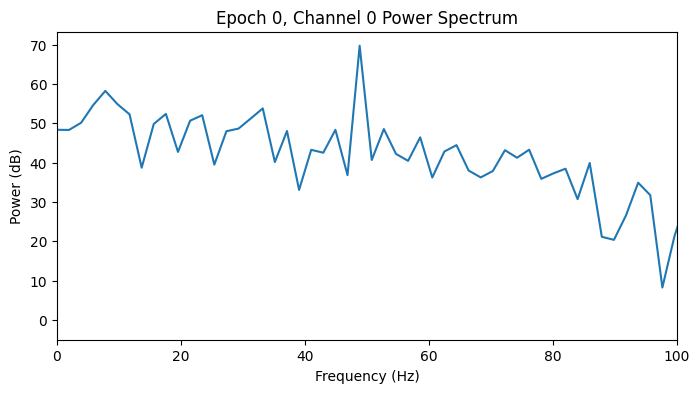

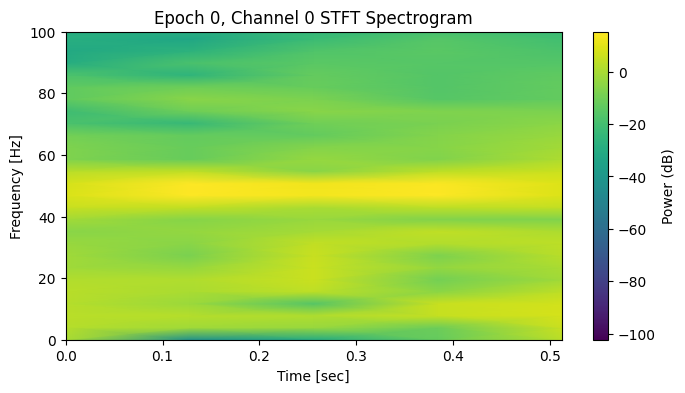

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, stft
srate = 1000
L = 512 #length of signal

def plot_power_spectrum(epoch_matrix, fs=srate, channel_idx=0):
    sig = epoch_matrix[channel_idx]
    freqs = np.fft.rfftfreq(L, d=1.0 / fs)
    spec = np.abs(np.fft.rfft(sig))
    spec_db = 20 * np.log10(spec + 1e-8)
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, spec_db)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power (dB)")
    plt.title(f"Epoch 0, Channel {channel_idx} Power Spectrum")
    plt.xlim(0, 100)
    plt.show()

def plot_spectrogram(epoch_matrix, fs=srate, channel_idx=0):
    sig = epoch_matrix[channel_idx]
    f_vals, t_vals, Zxx = stft(sig, fs=fs, nperseg=256, noverlap=128)
    Sxx = np.abs(Zxx)
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t_vals, f_vals, 20 * np.log10(Sxx + 1e-8), shading='gouraud')
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")
    plt.title(f"Epoch 0, Channel {channel_idx} STFT Spectrogram")
    plt.ylim(0, 100)
    plt.colorbar(label='Power (dB)')
    plt.show()

# Example plots for first epoch
epoch0 = eegs[0]
plot_power_spectrum(epoch0, srate, 0)
plot_spectrogram(epoch0, srate, 0)